<a href="https://colab.research.google.com/github/SHASHANK8412/Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Loading the Dataset


In [31]:
df=pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


Preprocessing and Model Selection

In [34]:
# Preprocessing: Encode categorical columns
for col in df.select_dtypes(include='object').columns:
  le=LabelEncoder()
  df[col]=df[col].astype(str)
  df[col]=le.fit_transform(df[col])

# Preprocessing: Handle Missing Values
imputer=SimpleImputer(strategy='mean')
df[:]=imputer.fit_transform(df)

# Define X and y after preprocessing
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Training the Model

In [38]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance

In [46]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy Score:  0.9363636363636364

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        92
           1       0.87      0.72      0.79        18

    accuracy                           0.94       110
   macro avg       0.91      0.85      0.88       110
weighted avg       0.93      0.94      0.93       110



Visualization and Confusion Matrix

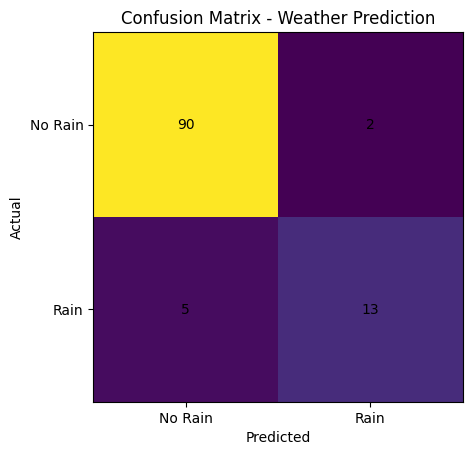

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Weather Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["No Rain", "Rain"])
plt.yticks([0, 1], ["No Rain", "Rain"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()